In [1]:
import sys 
sys.path.append('../../')

import torch
import matplotlib.pyplot as plt 
from einops import repeat

import numpy as np
from src.dd_gmg import DD_GMG1D, DD_GMG2D
from src.green_net import GreenNet1D
from src.model import MLP
from src.utils import rl2_error, matrl2_error
from src.dataset import load_dataset_1d
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
torch.set_printoptions(linewidth=120)

from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.dataset import load_dataset_1d
from matplotlib import ticker
from matplotlib.text import Text

import pandas as pd
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["axes.formatter.limits"] = [0, 0]
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)

# Poisson 1D

In [2]:
# load data
gl_poisson_kernel = np.load('../../results/poisson1d/GN1D-rational-513-50-1.0000-none-2/approx_kernel.npy')
glaug_poisson_kernel = np.load('../../results/poisson1d/GN1D-rational-513-50-1.0000-aug2-2/approx_kernel.npy')

# process green's function
idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = poisson_kernel(x_i[:,0], x_i[:,1], h).numpy()#.reshape(nh, nh)
G_gl = gl_poisson_kernel.reshape(-1)/h #.reshape(513,513) / h
G_glaug = glaug_poisson_kernel/h #.reshape(513,513) / h

levels =  np.linspace(0,0.25,30)

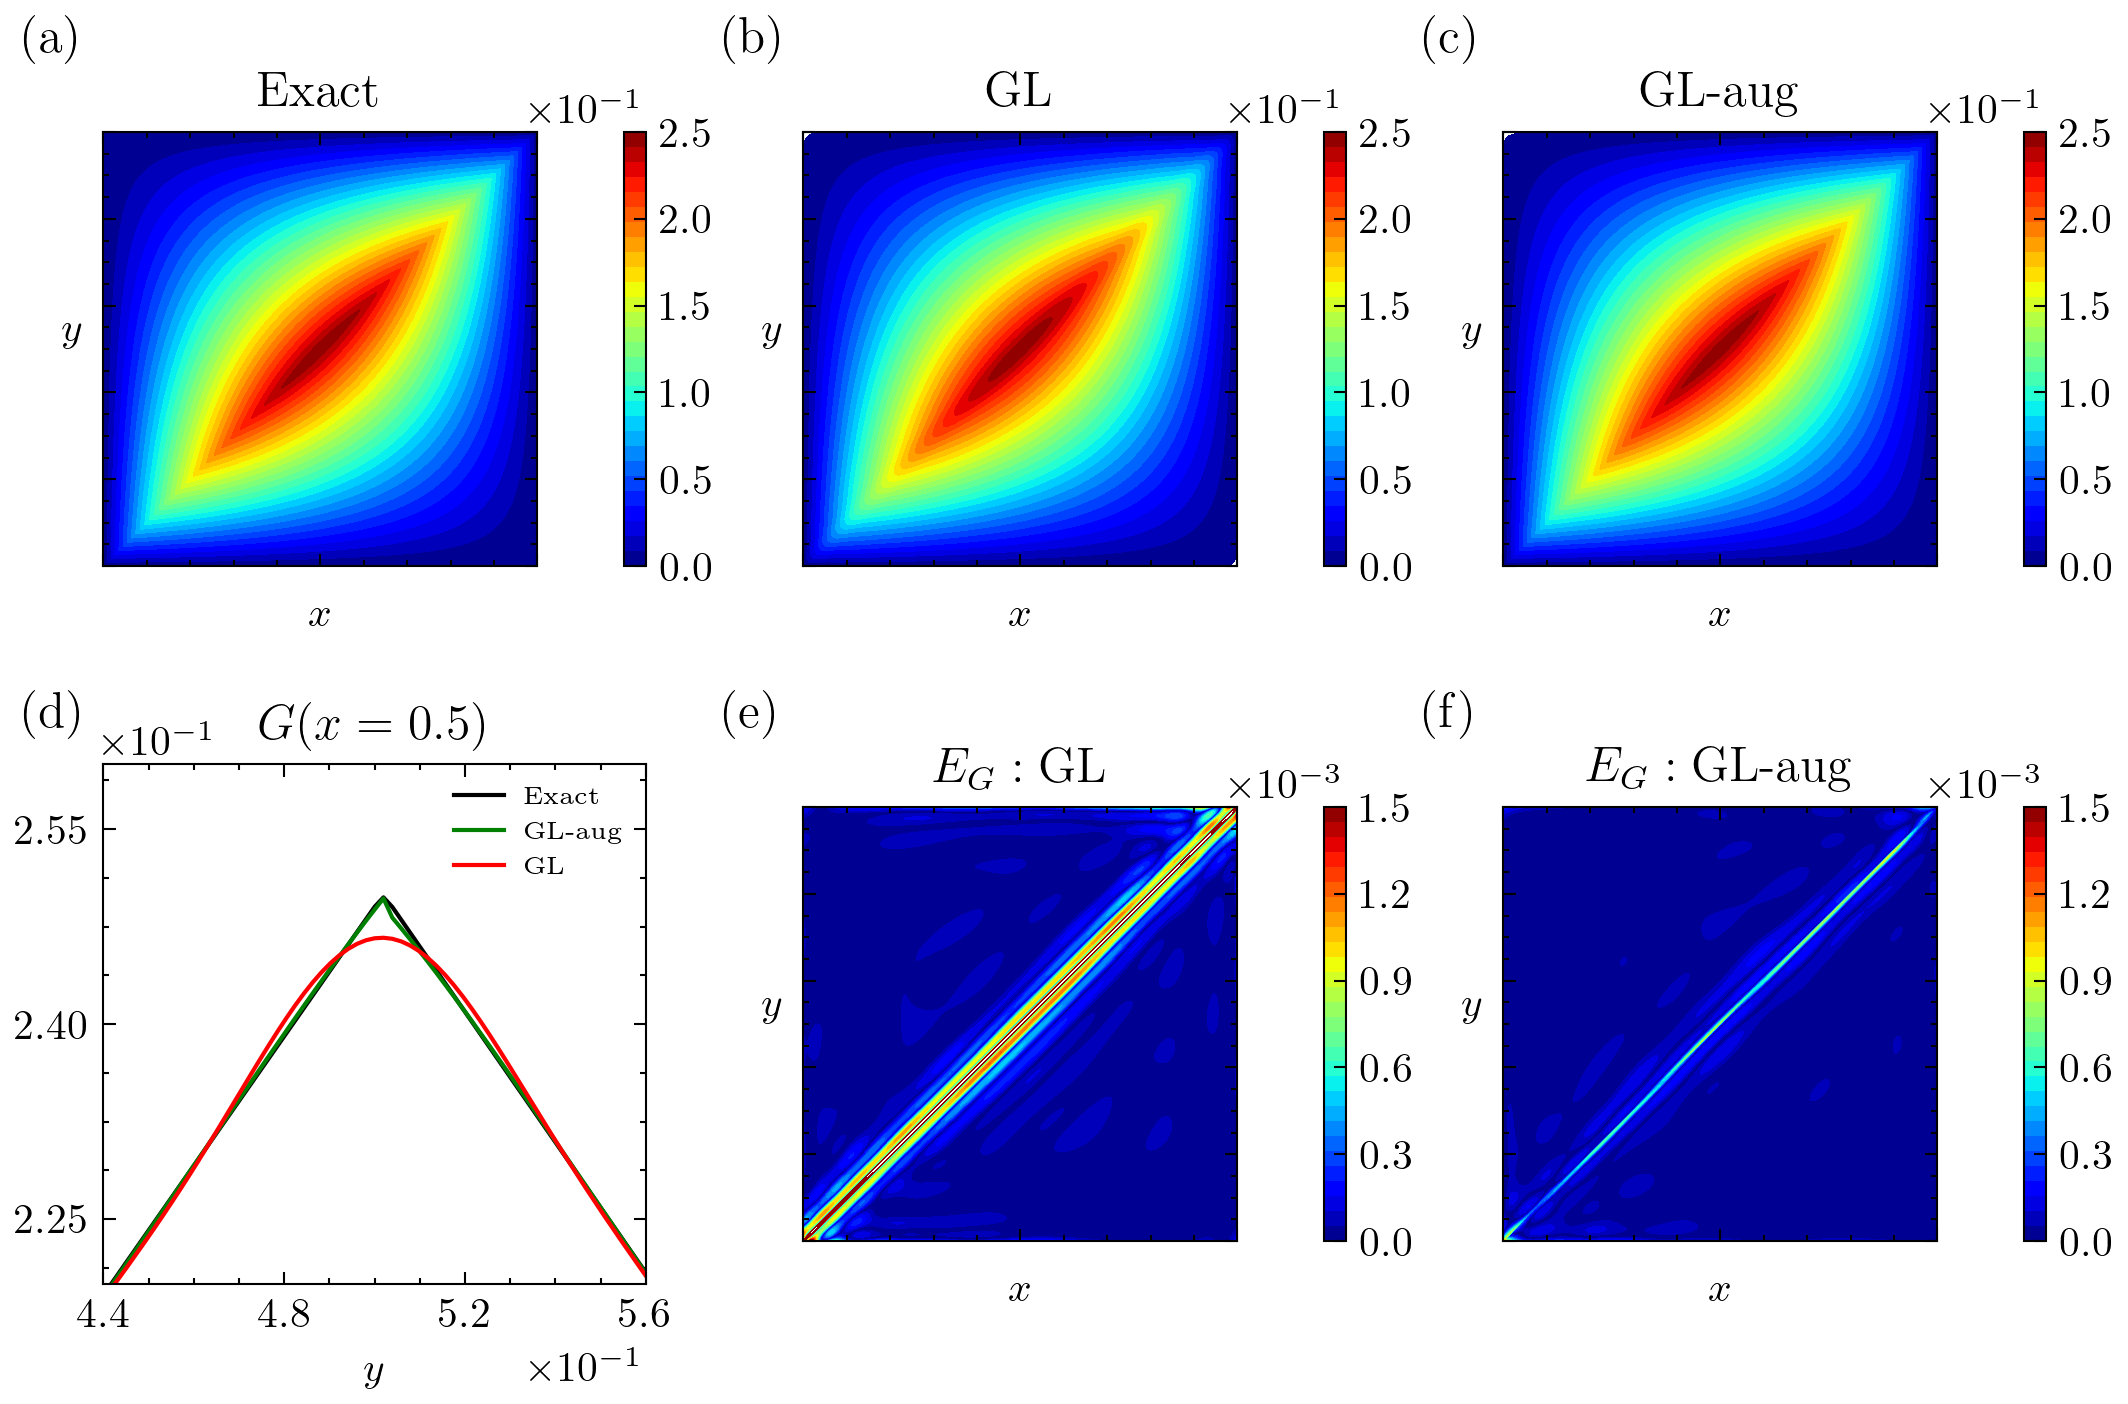

In [3]:
f = plt.figure(figsize=(7,4.5))
subfigs = f.subfigures(2,3).flatten()

levels =  np.linspace(0,0.25,30)

# Exact 
ax = subfigs[0].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Exact')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(sub_tag)

# GL kernel 
ax = subfigs[1].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gl.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(sub_tag)

# GL-aug kernel
ax = subfigs[2].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_glaug.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
subfigs[2].add_artist(sub_tag)

# slice 
G_ = G.reshape(nh,nh)[idx]
G_gl_ = G_gl.reshape(nh,nh)[idx]
G_glaug_ = G_glaug.reshape(nh,nh)[idx]

ax = subfigs[3].subplots()
ax.plot(xh, G_, '-k',label='Exact')
ax.plot(xh, G_glaug_, '-g',label='GL-aug')
ax.plot(xh, G_gl_, '-r', label='GL')
ax.title.set_text('$G(x=0.5)$')
ax.set_xlabel('$y$')
ax.set_xlim([0.44, 0.56])
ax.set_ylim([0.22, 0.26])
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

# ax.set_ylabel('$G(x=0.5)$', rotation=0)
# axins = ax.inset_axes(
#     [0.1, 0.6, 0.3, 0.3], xlim=(0.45, 0.55),ylim=(0.24,0.26),
#     xticklabels=[], yticklabels=[])
# axins.plot(xh, G_, '-k', label='analytic')
# axins.plot(xh, G_glaug_, '-g', label='GL-aug')
# axins.plot(xh, G_gl_, '-r', label='GL')
# ax.indicate_inset_zoom(axins)
ax.legend(loc='upper right', fontsize=6)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
subfigs[3].add_artist(sub_tag)

# Err GL
ax = subfigs[4].subplots()
levels = np.linspace(0, 0.0015,30)
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gl-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('$E_G : \\text{GL}$')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(e)', fontsize=12, transform=subfigs[4].transSubfigure, ha="left", va="top")
subfigs[4].add_artist(sub_tag)


# Err GL-aug
ax = subfigs[5].subplots()
levels = np.linspace(0, 0.0015,30)
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_glaug-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('$E_G : \\text{GL-aug}$')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(f)', fontsize=12, transform=subfigs[5].transSubfigure, ha="left", va="top")
subfigs[5].add_artist(sub_tag)


outnm = './poisson1d_GL-aug_result.pdf'
plt.savefig(outnm)


# Logarithm 1D

In [4]:
gl_log_kernel = np.load('../../results/logarithm/GN1D-rational-513-50-1.0000-none-2/approx_kernel.npy')
glaug_log_kernel = np.load('../../results/logarithm/GN1D-rational-513-50-1.0000-aug2-2/approx_kernel.npy')

# process green's function
idx = 257
nh = 513
h = 2/(nh-1) # x in [-1, 1]
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = logarithm_kernel(x_i[:,0], x_i[:,1], h).numpy()#.reshape(nh, nh)
G_gl = gl_log_kernel.reshape(-1)/h #.reshape(513,513) / h
G_glaug = glaug_log_kernel/h #.reshape(513,513) / h

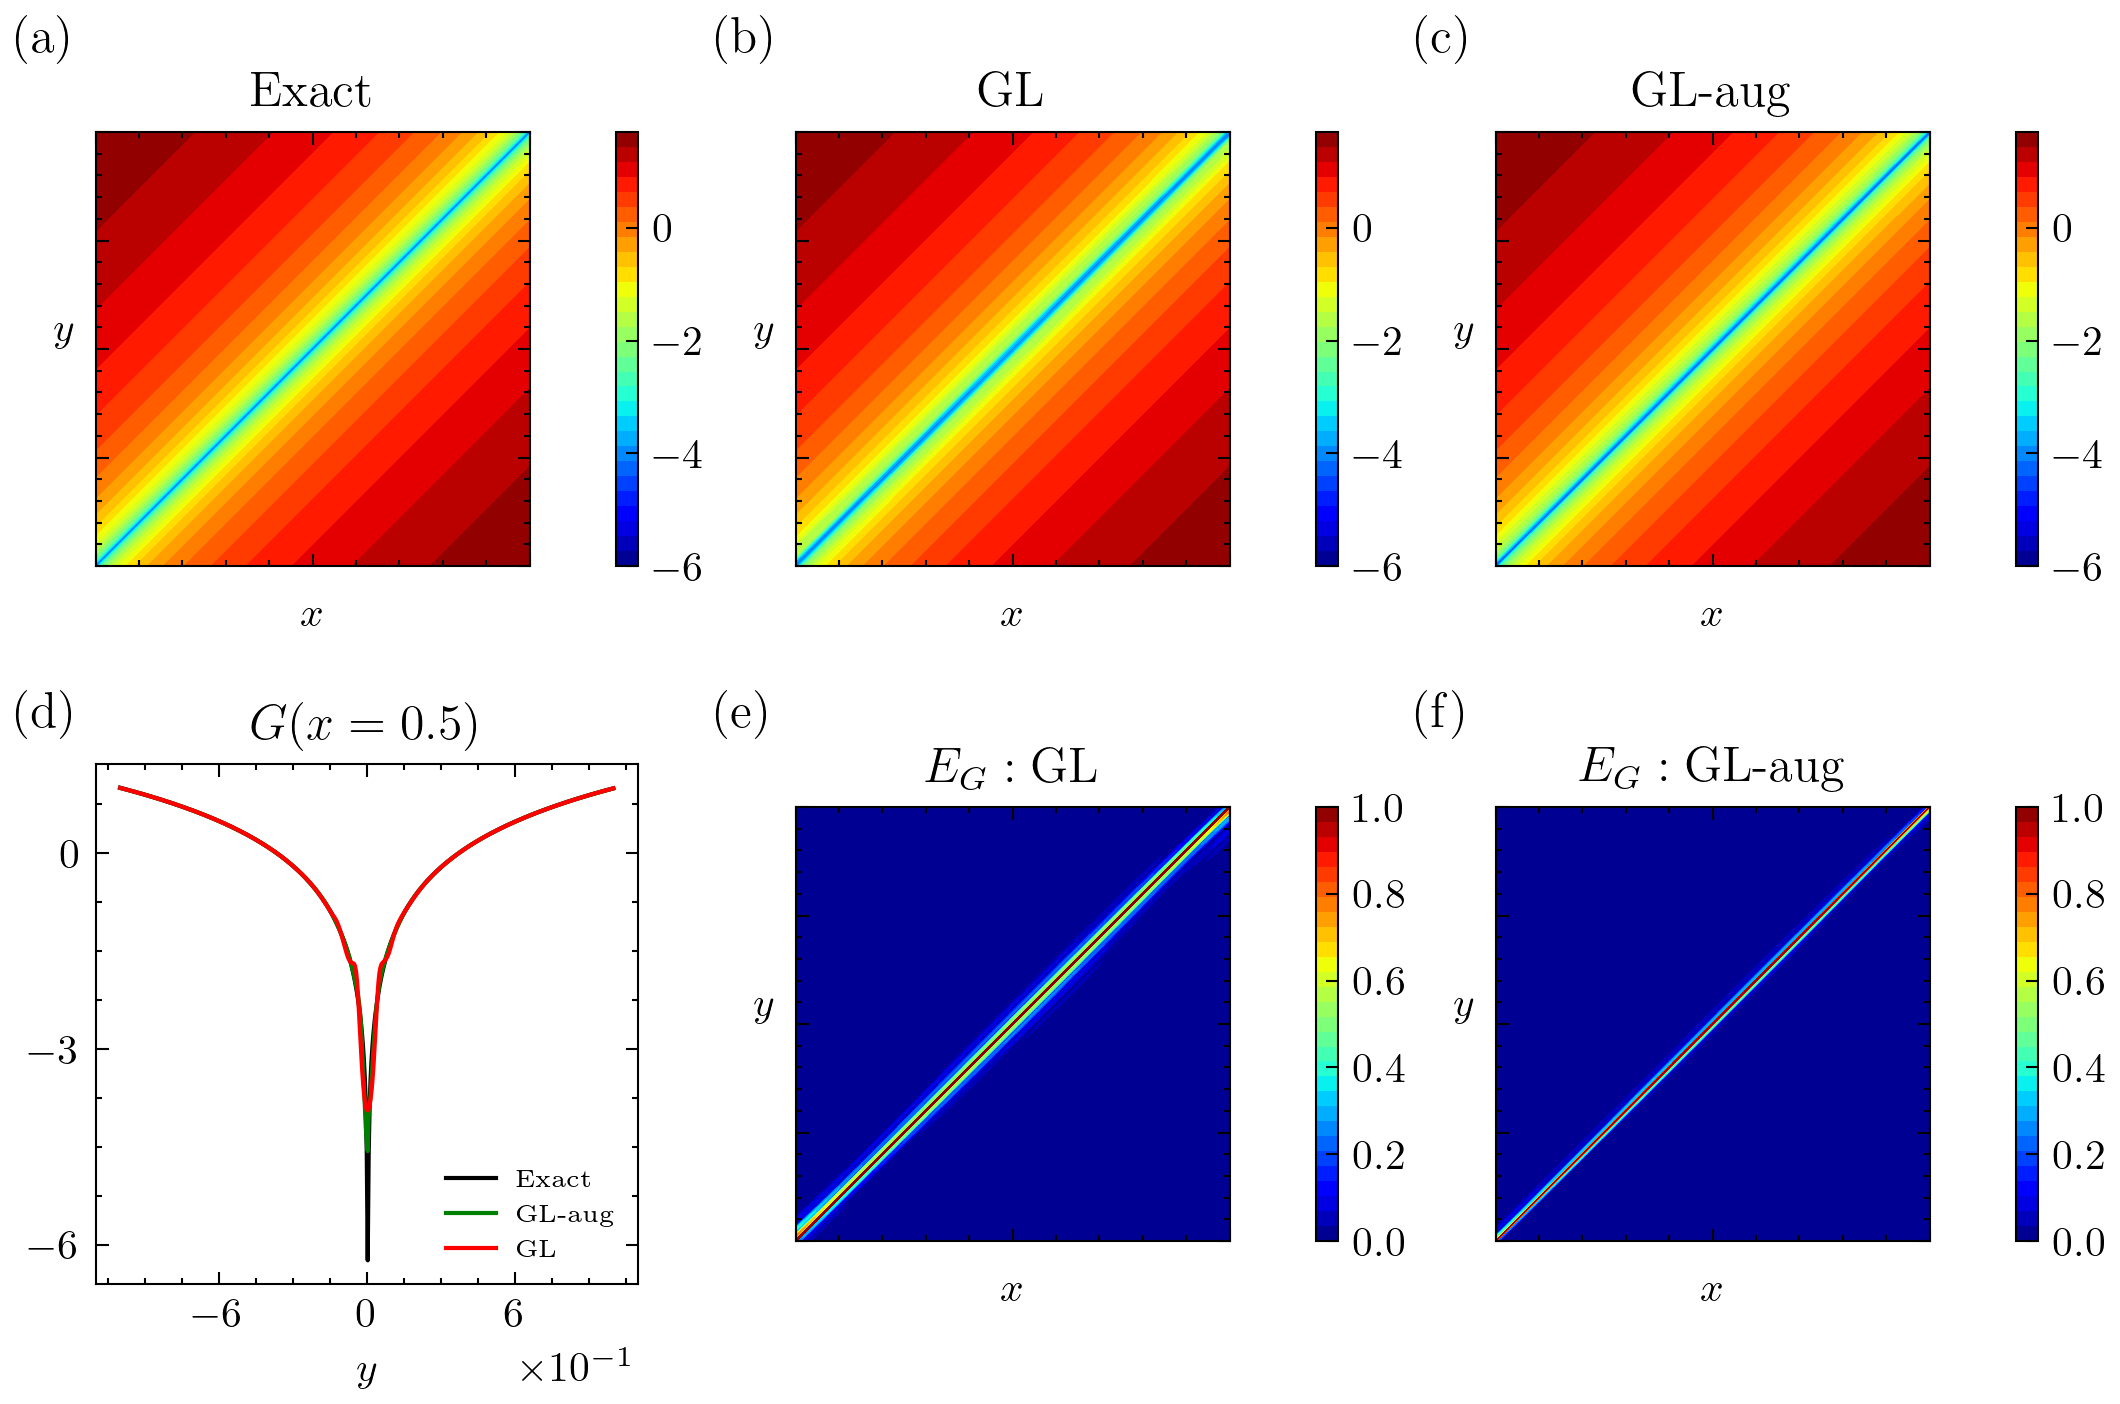

In [5]:
f = plt.figure(figsize=(7,4.5))
subfigs = f.subfigures(2,3).flatten()

levels =   np.linspace(-6,1.7,30)

# Exact 
ax = subfigs[0].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Exact')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(sub_tag)

# GL kernel 
ax = subfigs[1].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gl.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(sub_tag)

# GL-aug kernel
ax = subfigs[2].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_glaug.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
subfigs[2].add_artist(sub_tag)

# slice 
G_ = G.reshape(nh,nh)[idx]
G_gl_ = G_gl.reshape(nh,nh)[idx]
G_glaug_ = G_glaug.reshape(nh,nh)[idx]

ax = subfigs[3].subplots()
ax.plot(xh, G_, '-k',label='Exact')
ax.plot(xh, G_glaug_, '-g',label='GL-aug')
ax.plot(xh, G_gl_, '-r', label='GL')
ax.title.set_text('$G(x=0.5)$')
ax.set_xlabel('$y$')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax.legend(loc='lower right', fontsize=6)
sub_tag = Text(0.01, 0.99, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
subfigs[3].add_artist(sub_tag)

# Err GL
ax = subfigs[4].subplots()
levels = np.linspace(0, 1., 30)
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gl-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('$E_G : \\text{GL}$')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(e)', fontsize=12, transform=subfigs[4].transSubfigure, ha="left", va="top")
subfigs[4].add_artist(sub_tag)


# Err GL-aug
ax = subfigs[5].subplots()
levels = np.linspace(0, 1., 30)
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_glaug-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('$E_{G} : \\text{GL-aug}$')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(f)', fontsize=12, transform=subfigs[5].transSubfigure, ha="left", va="top")
subfigs[5].add_artist(sub_tag)


outnm = './log1d_GL-aug_result.pdf'
plt.savefig(outnm)


# Schrodinger 1D

In [6]:
from src.dataset import load_mat1d, load_mat2d
from src.utils import rl2_error

In [7]:
# load data
task = 'schrodinger1d'
seed = 4
gl_schrodinger_kernel = np.load('../../results/schrodinger1d/GN1D-rational-513-50-1.0000-none-{:}/approx_kernel.npy'.format(seed))
glaug_schrodinger_kernel = np.load('../../results/schrodinger1d/GN1D-rational-513-50-1.0000-aug2-{:}/approx_kernel.npy'.format(seed))

# process green's function
idx = 257
nh = 513
h = 6/(nh-1) # x in [-1, 1]
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G_gl = gl_schrodinger_kernel.reshape(-1) / h
G_glaug = glaug_schrodinger_kernel / h

ntest = 100
F_test = load_mat1d('../../dataset/f1d_513_3.00e-02.mat', 'F', ntest, False)
U_test = load_mat1d('../../dataset/schrodinger1d_513_3.00e-02.mat', 'U', ntest, False)

U_glaug = h * G_glaug.reshape(nh,nh) @ F_test
U_gl = h * G_gl.reshape(nh,nh) @ F_test

err_diff = []
for i in range(ntest):
    err_gnaug = rl2_error(U_glaug[:,i], U_test[:,i])
    err_gn = rl2_error(U_gl[:,i], U_test[:,i])
    err_diff.append(err_gnaug - err_gn)
print(np.argmin(err_diff), min(err_diff))

idx = np.argmin(err_diff)

87 -0.001135003649443579


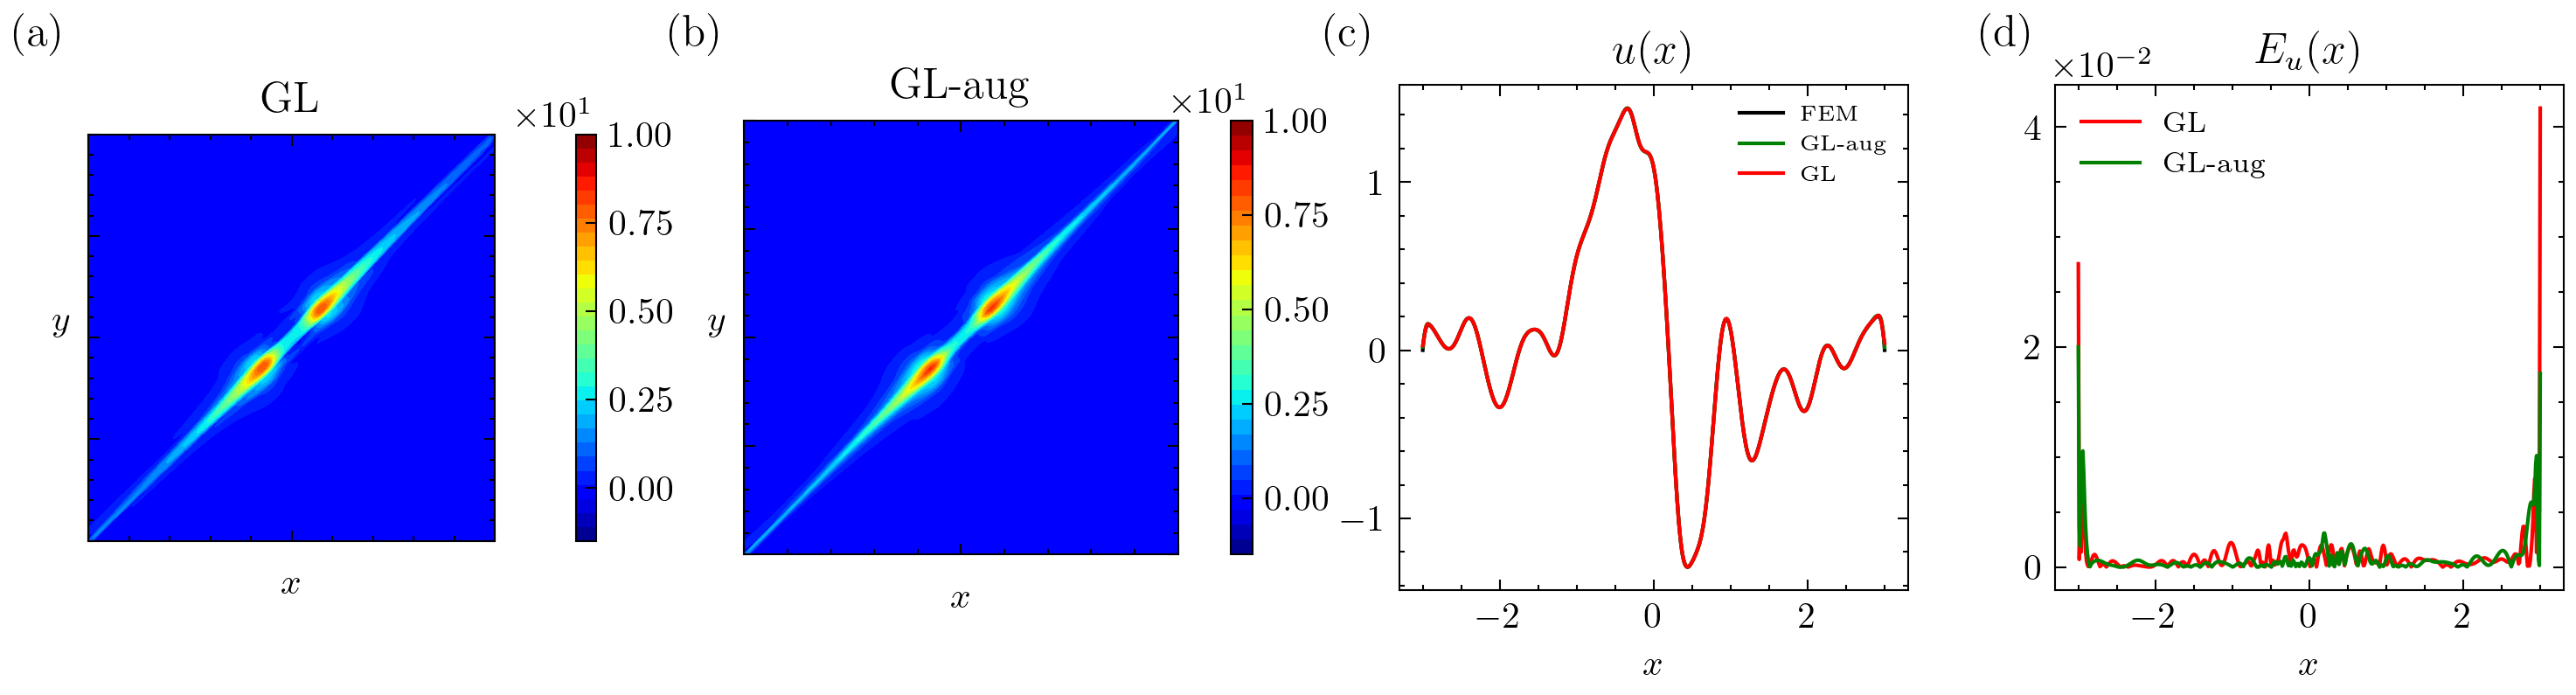

In [8]:
f = plt.figure(figsize=(10,2.5))#, constrained_layout=True)
subfigs = f.subfigures(1,4).flatten()

levels = np.linspace(-1.5,10,30)

# GL kernel 
ax = subfigs[0].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gl.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(sub_tag)

# GL-aug kernel
ax = subfigs[1].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_glaug.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(sub_tag)

# u(x) 
ax = subfigs[2].subplots()
ax.plot(xh*3, U_test[:,idx], '-k',label='FEM')
ax.plot(xh*3, U_glaug[:,idx], '-g',label='GL-aug')
ax.plot(xh*3, U_gl[:,idx], '-r', label='GL')
ax.title.set_text('$u(x)$')
ax.set_xlabel('$x$')
ax.legend(loc='upper right', fontsize=6)
sub_tag = Text(0.01, 0.99, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
subfigs[2].add_artist(sub_tag)

# u(x) Err
ax = subfigs[3].subplots()
ax.plot(xh*3, np.abs(U_test[:,idx] - U_gl[:,idx]), '-r', label='GL')
ax.plot(xh*3, np.abs(U_test[:,idx] - U_glaug[:,idx]), '-g', label='GL-aug')
# ax.set_ylim([0,5e-2])
ax.legend(loc='upper left', fontsize=8)
ax.set_title('$E_u(x)$')
ax.set_xlabel('$x$')
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax.legend(loc='upper left', fontsize=8)
sub_tag = Text(0.01, 0.99, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
subfigs[3].add_artist(sub_tag)

outnm = './schrodinger1d_GL-aug_result.pdf'
# plt.tight_layout()
plt.savefig(outnm)


# Airy 1D

In [9]:
# load data
task = 'airy1d'
seed = 2
gl_airy_df = pd.read_csv('../../results/{:}/GN1D-rational-513-50-1.0000-none-{:}/hist.csv'.format(task, seed))
glaug_airy_df = pd.read_csv('../../results/{:}/GN1D-rational-513-50-1.0000-aug2-{:}/hist.csv'.format(task,seed))
gl_airy_kernel = np.load('../../results/{:}/GN1D-rational-513-50-1.0000-none-{:}/approx_kernel.npy'.format(task,seed))
glaug_airy_kernel = np.load('../../results/{:}/GN1D-rational-513-50-1.0000-aug2-{:}/approx_kernel.npy'.format(task,seed))

# process green's function
idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G_gl = gl_airy_kernel.reshape(-1) / h
G_glaug = glaug_airy_kernel / h

ntest = 100
F_test = load_mat1d('../../dataset/f1d_513_3.00e-02.mat', 'F', ntest, False)
U_test = load_mat1d('../../dataset/{:}_513_3.00e-02.mat'.format(task), 'U', ntest, False)

U_glaug = h * G_glaug.reshape(nh,nh) @ F_test
U_gl = h * G_gl.reshape(nh,nh) @ F_test

err_diff = []
for i in range(ntest):
    err_gnaug = rl2_error(U_glaug[:,i], U_test[:,i])
    err_gn = rl2_error(U_gl[:,i], U_test[:,i])
    err_diff.append(err_gnaug - err_gn)
print(np.argmin(err_diff), min(err_diff))

idx = np.argmin(err_diff)

45 -0.0006746734144513057


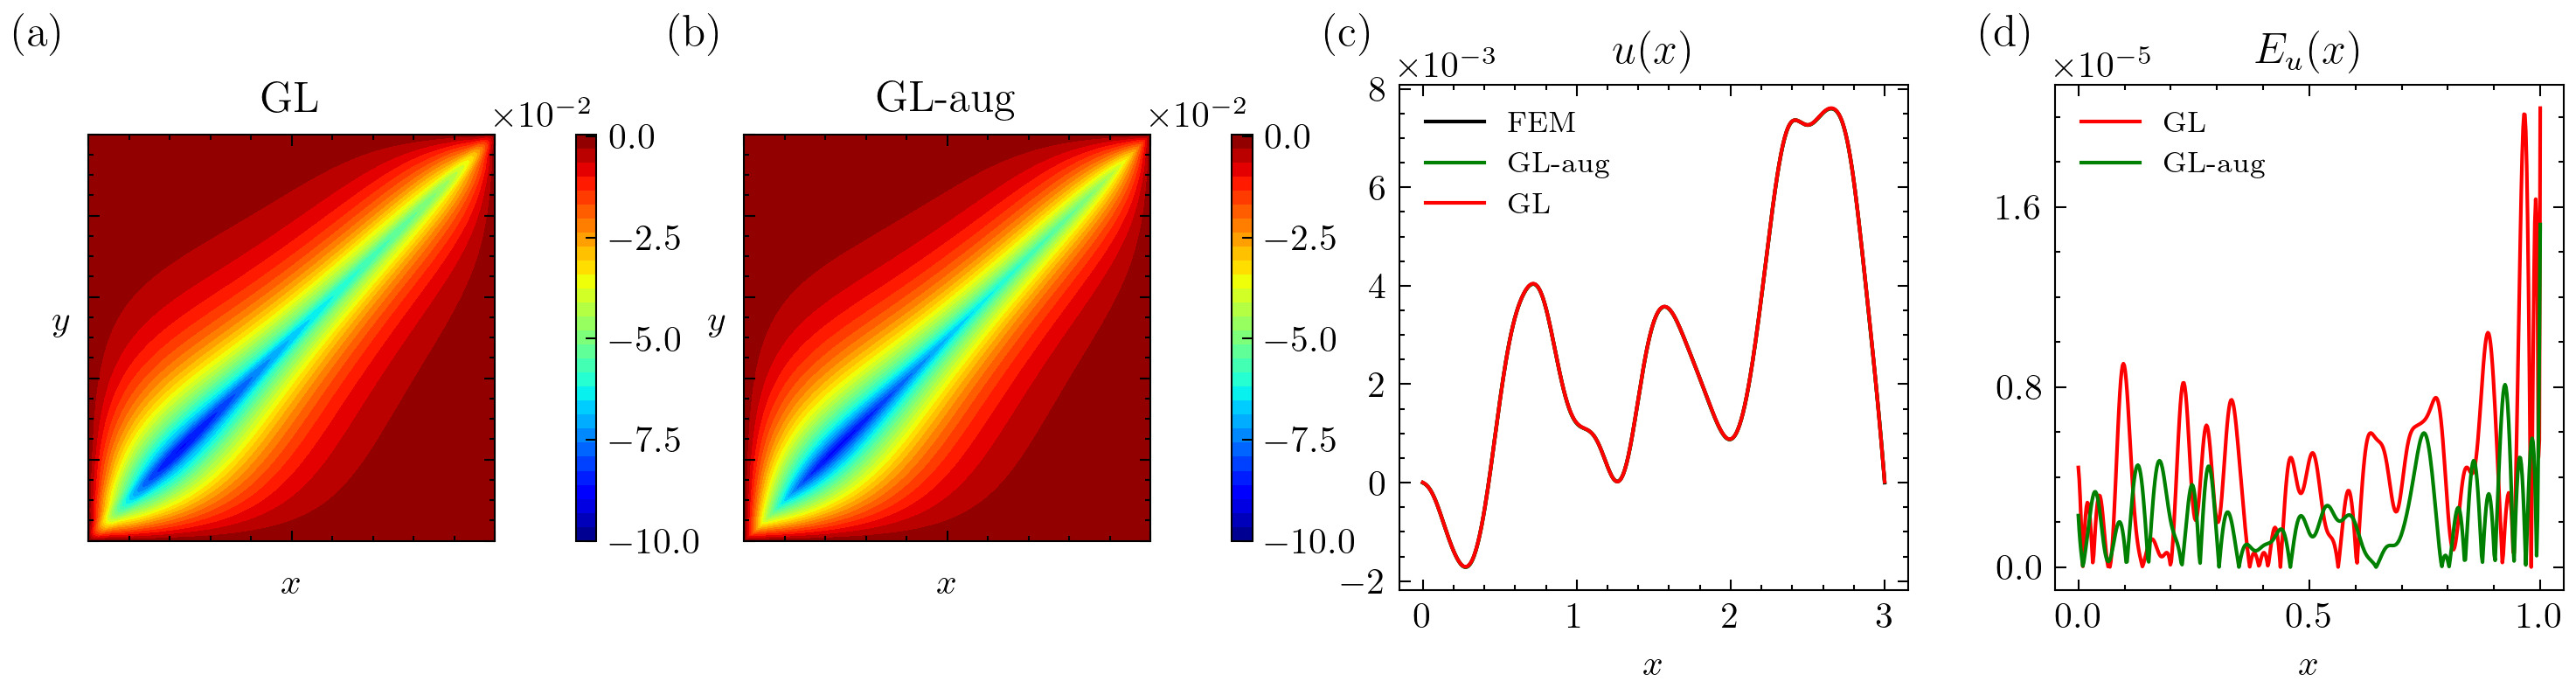

In [10]:
# f = plt.figure(figsize=(7,7))
f = plt.figure(figsize=(10,2.5))
subfigs = f.subfigures(1,4).flatten()

levels = np.linspace(-0.1, 0.0005, 30)

# GL kernel 
ax = subfigs[0].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gl.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((-2, -2))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(sub_tag)

# GL-aug kernel
ax = subfigs[1].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_glaug.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((-2, -2))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(sub_tag)

# u(x) 
ax = subfigs[2].subplots()
ax.plot(xh*3, U_test[:,idx], '-k',label='FEM')
ax.plot(xh*3, U_glaug[:,idx], '-g',label='GL-aug')
ax.plot(xh*3, U_gl[:,idx], '-r', label='GL')
ax.title.set_text('$u(x)$')
ax.set_xlabel('$x$')
ax.legend(loc='upper left', fontsize=8)
sub_tag = Text(0.01, 0.99, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
subfigs[2].add_artist(sub_tag)

# u(x) Err
ax = subfigs[3].subplots()
ax.plot(xh, np.abs(U_test[:,idx] - U_gl[:,idx]), '-r', label='GL')
ax.plot(xh, np.abs(U_test[:,idx] - U_glaug[:,idx]), '-g', label='GL-aug')
ax.set_title('$E_u(x)$')
ax.set_xlabel('$x$')
ax.legend(loc='upper left', fontsize=8)
# ax.set_ylim([0,2e-5])
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
sub_tag = Text(0.01, 0.99, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
subfigs[3].add_artist(sub_tag)

outnm = './airy1d_GL-aug_result.pdf'
plt.savefig(outnm)


# Boundary 1D

In [11]:
# load data
task = 'boundary1d'
seed = 1
gl_boundary_kernel = np.load('../../results/{:}/GN1D-rational-513-50-1.0000-none-{:}/approx_kernel.npy'.format(task,seed))
glaug_boundary_kernel = np.load('../../results/{:}/GN1D-rational-513-50-1.0000-aug2-{:}/approx_kernel.npy'.format(task,seed))

# process green's function
idx = 257
nh = 513
h = 1/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G_gl = gl_boundary_kernel.reshape(-1) / h
G_glaug = glaug_boundary_kernel / h

ntest = 100
F_test = load_mat1d('../../dataset/f1d_513_3.00e-02.mat', 'F', ntest, False)
U_test = load_mat1d('../../dataset/{:}_513_3.00e-02.mat'.format(task), 'U', ntest, False)

U_glaug = h * G_glaug.reshape(nh,nh) @ F_test
U_gl = h * G_gl.reshape(nh,nh) @ F_test

err_diff = []
for i in range(ntest):
    err_gnaug = rl2_error(U_glaug[:,i], U_test[:,i])
    err_gn = rl2_error(U_gl[:,i], U_test[:,i])
    err_diff.append(err_gnaug - err_gn)
print(np.argmin(err_diff), min(err_diff))

idx = np.argmin(err_diff)

87 -0.00037952552881514534


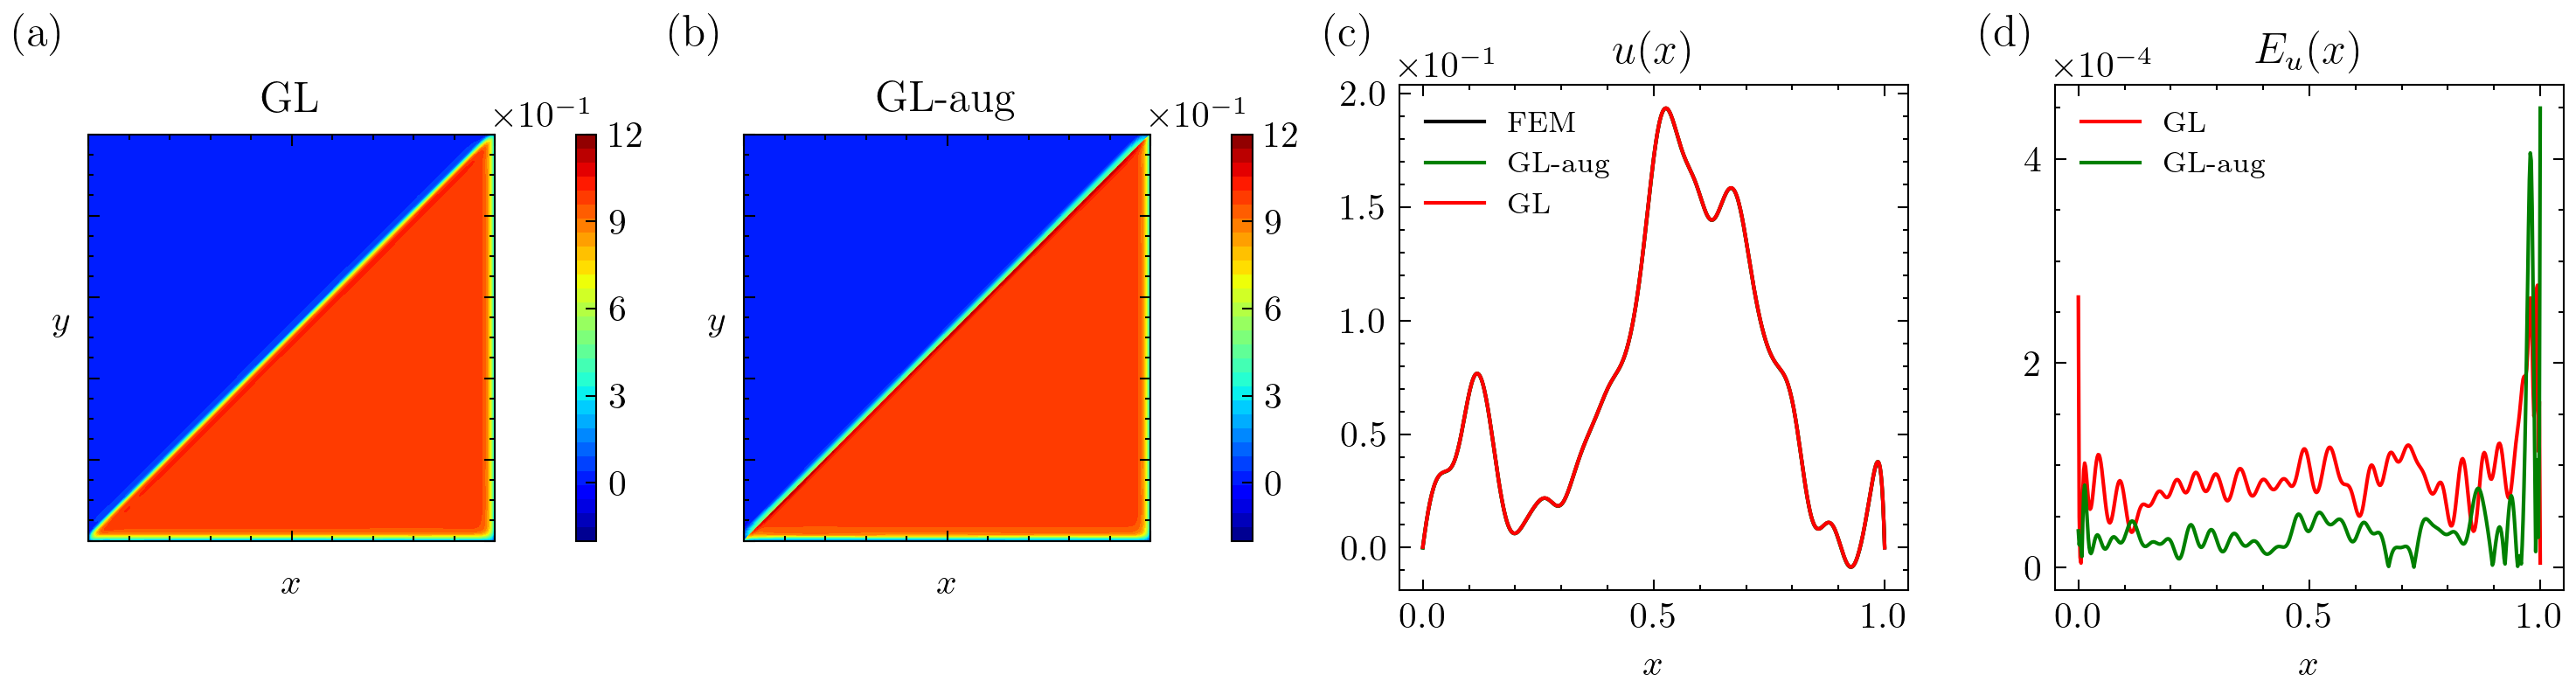

In [12]:
# f = plt.figure(figsize=(7,7))
f = plt.figure(figsize=(10,2.5))
subfigs = f.subfigures(1,4).flatten()

levels = np.linspace(-0.2, 1.2, 30)

# GL kernel 
ax = subfigs[0].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gl.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(sub_tag)

# GL-aug kernel
ax = subfigs[1].subplots()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_glaug.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
sub_tag = Text(0.01, 0.99, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(sub_tag)

# u(x) 
ax = subfigs[2].subplots()
ax.plot(xh, U_test[:,idx], '-k',label='FEM')
ax.plot(xh, U_glaug[:,idx], '-g',label='GL-aug')
ax.plot(xh, U_gl[:,idx], '-r', label='GL')
ax.title.set_text('$u(x)$')
ax.set_xlabel('$x$')
ax.legend(loc='upper left', fontsize=8)
sub_tag = Text(0.01, 0.99, '(c)', fontsize=12, transform=subfigs[2].transSubfigure, ha="left", va="top")
subfigs[2].add_artist(sub_tag)

# u(x) Err GL
ax = subfigs[3].subplots()
ax.plot(xh, np.abs(U_test[:,idx] - U_gl[:,idx]), '-r', label='GL')
ax.plot(xh, np.abs(U_test[:,idx] - U_glaug[:,idx]), '-g', label='GL-aug')
ax.set_title('$E_u(x)$')
ax.set_xlabel('$x$')
ax.legend(loc='upper left', fontsize=8)
# ax.set_ylim([0,2e-4])
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
sub_tag = Text(0.01, 0.99, '(d)', fontsize=12, transform=subfigs[3].transSubfigure, ha="left", va="top")
subfigs[3].add_artist(sub_tag)


outnm = './boundary1d_GL-aug_result.pdf'
plt.savefig(outnm)


# Poisson 2D rect

In [13]:
task = 'poissonrect'
seed = 1
gn_poissonrect_kernel = np.load('../../results/{:}/GN2D-rational-65x65-50-0.2000-none-{:}/approx_kernel.npy'.format(task, seed))
gnaug2_poissonrect_kernel = np.load('../../results/{:}/GN2D-rational-65x65-50-0.2000-aug2-{:}/approx_kernel.npy'.format(task, seed))

nh = 65
h = 2/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
xhh = torch.cartesian_prod(xh, xh)

G_gn = gn_poissonrect_kernel
G_gnaug = gnaug2_poissonrect_kernel

ntest = 100
F_test = load_mat2d('../../dataset/frect_65x65_2.00e-01.mat', 'F', ntest, False).T
U_test = load_mat2d('../../dataset/{:}_65x65_2.00e-01.mat'.format(task), 'U', ntest, False).T

U_gnaug = h**2 * G_gnaug.reshape(nh**2,nh**2) @ F_test
U_gn = h**2 * G_gn.reshape(nh**2,nh**2) @ F_test

err_diff = []
for i in range(ntest):
    err_gnaug = rl2_error(U_gnaug[:,i], U_test[:,i])
    err_gn = rl2_error(U_gn[:,i], U_test[:,i])
    err_diff.append(err_gnaug - err_gn)
print(np.argmin(err_diff), "{:.4e}".format(min(err_diff)))

50 -3.3068e-03


/tmp/ipykernel_4188841/3923108244.py:111: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 10 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')
/tmp/ipykernel_4188841/3923108244.py:129: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 12 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')
/tmp/ipykernel_4188841/3923108244.py:150: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 14 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')


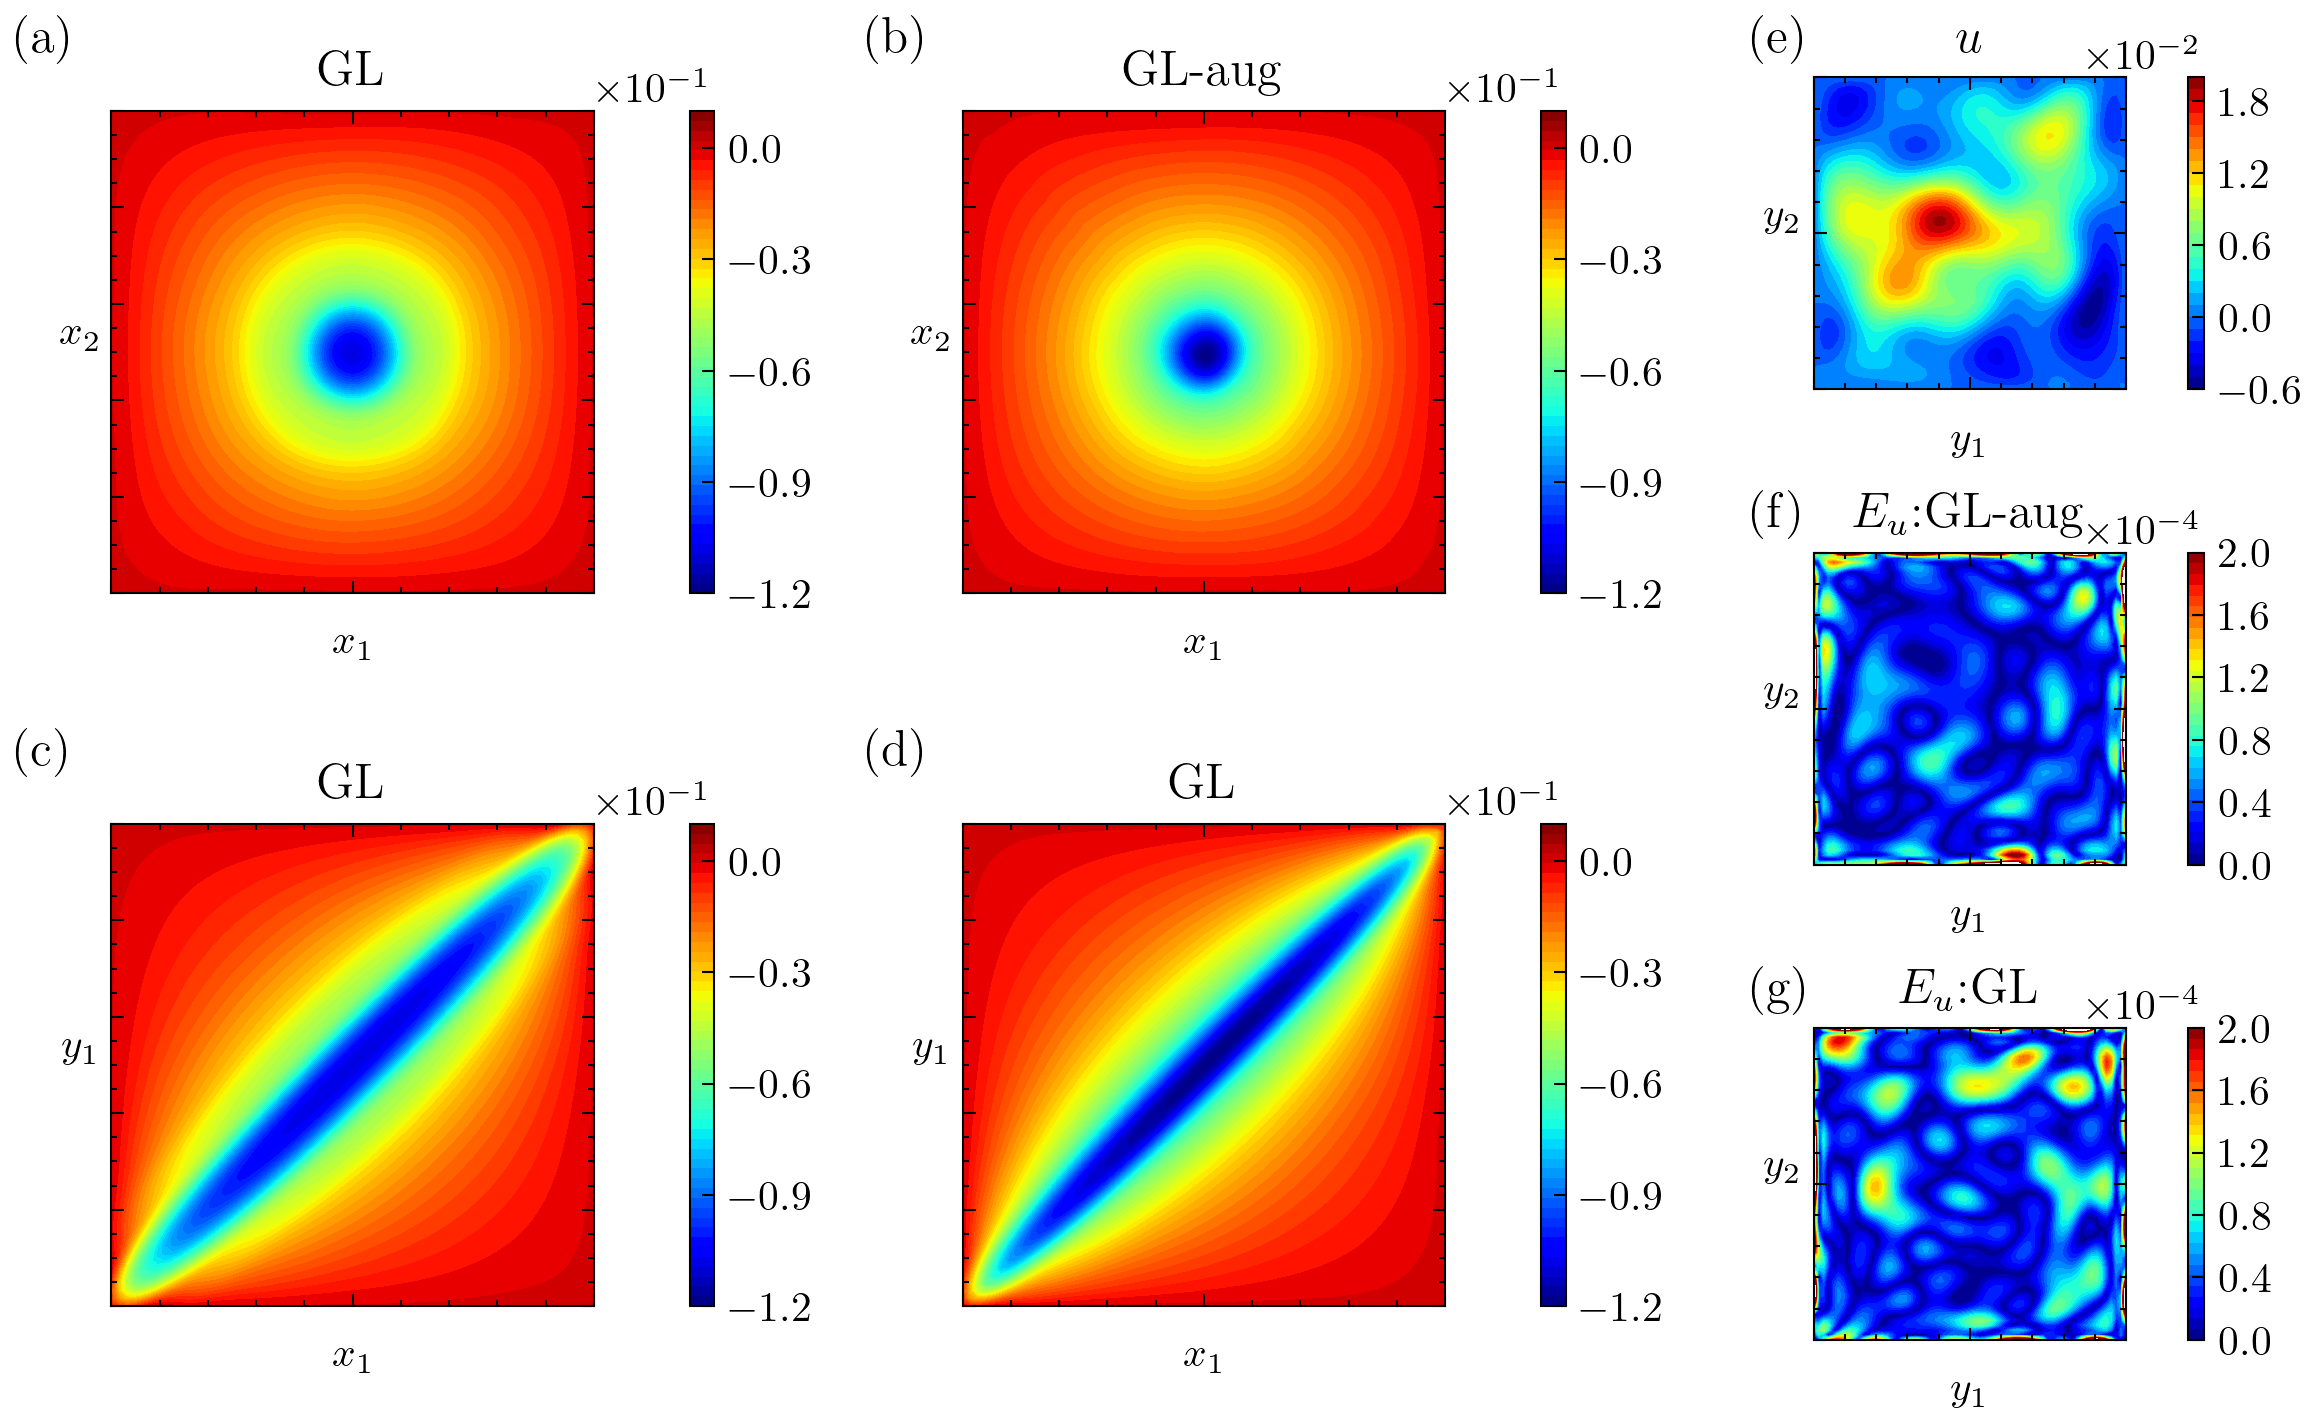

In [14]:
idx = 0 # np.argmin(err_diff)

G_gn = gn_poissonrect_kernel.reshape(65,65,65,65)
G_gnaug = gnaug2_poissonrect_kernel.reshape(65,65,65,65)

fig = plt.figure(figsize=(9,6))#, layout="constrained")
# gs0 = fig.add_gridspec(1, 2, left=1, right=2)

# gs00 = gs0[0].subgridspec(2, 2, wspace=0.1)
# gs01 = gs0[1].subgridspec(3, 1)

levels = np.linspace(-0.12,0.01)

# GL(x1,x2,0,0)
# ax = fig.add_subplot(gs00[0,0])
ax = plt.subplot2grid((6,10),(0,0), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gn[:,:,32,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(a)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL-aug(x1,x2,0,0)
# ax = fig.add_subplot(gs00[0,1])
ax = plt.subplot2grid((6,10),(0,4), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gnaug[:,:,32,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL-aug}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(b)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL(x1,0,y1,0)
# ax = fig.add_subplot(gs00[1,0])
ax = plt.subplot2grid((6,10),(3,0), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gn[:,32,:,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(c)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# GL-aug(x1,0,y1,0)
# ax = fig.add_subplot(gs00[1,1])
ax = plt.subplot2grid((6,10),(3,4), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gnaug[:,32,:,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(d)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# # plt.tight_layout()

# U ref
# ax = fig.add_subplot(gs01[0,0])
ax = plt.subplot2grid((6,10),(0,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    U_test[:,idx].reshape(nh,nh), cmap='jet', levels=30)
ax.title.set_text('$u$')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(e)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL-aug E 
err_levels = np.linspace(0,2e-4,30)
# ax = fig.add_subplot(gs01[1,0])
ax = plt.subplot2grid((6,10),(2,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    np.abs(U_test[:,idx]-U_gnaug[:,idx]).reshape(nh,nh), 
    vmin=0, vmax=2e-4, cmap='jet', levels=err_levels)
ax.title.set_text('$E_u$:GL-aug')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(f)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# GL E
# ax = fig.add_subplot(gs01[2,0])
ax = plt.subplot2grid((6,10),(4,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    np.abs(U_test[:,idx]-U_gn[:,idx]).reshape(nh,nh), 
    vmin=0, vmax=2e-4, cmap='jet', levels=err_levels)
ax.title.set_text('$E_u$:GL')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(g)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# plt.tight_layout()

outnm = './poissonrect-aug_result.pdf'
plt.savefig(outnm)

# Darcy's Flow

In [15]:
task = 'darcyrect'
seed = 1
gn_poissonrect_kernel = np.load('../../results/{:}/GN2D-rational-65x65-50-0.2000-none-{:}/approx_kernel.npy'.format(task, seed))
gnaug2_poissonrect_kernel = np.load('../../results/{:}/GN2D-rational-65x65-50-0.2000-aug2-{:}/approx_kernel.npy'.format(task, seed))

nh = 65
h = 2/(nh-1) # x in [-1, 1]
xh = torch.linspace(0,1,nh)
xhh = torch.cartesian_prod(xh, xh)

G_gn = gn_poissonrect_kernel
G_gnaug = gnaug2_poissonrect_kernel

ntest = 100
F_test = load_mat2d('../../dataset/frect_65x65_2.00e-01.mat', 'F', ntest, False).T
U_test = load_mat2d('../../dataset/{:}_65x65_2.00e-01.mat'.format(task), 'U', ntest, False).T

U_gnaug = h**2 * G_gnaug.reshape(nh**2,nh**2) @ F_test
U_gn = h**2 * G_gn.reshape(nh**2,nh**2) @ F_test

err_diff = []
for i in range(ntest):
    err_gnaug = rl2_error(U_gnaug[:,i], U_test[:,i])
    err_gn = rl2_error(U_gn[:,i], U_test[:,i])
    err_diff.append(err_gnaug - err_gn)
print(np.argmin(err_diff), "{:.4e}".format(min(err_diff)))

35 -4.7563e-03


/tmp/ipykernel_4188841/1782957721.py:111: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 10 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')
/tmp/ipykernel_4188841/1782957721.py:129: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 12 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')
/tmp/ipykernel_4188841/1782957721.py:150: UserWarning: Adding colorbar to a different Figure <Figure size 2700x1800 with 14 Axes> than <Figure size 3000x750 with 6 Axes> which fig.colorbar is called on.
  cbar = f.colorbar(im, cax=cax, orientation='vertical')


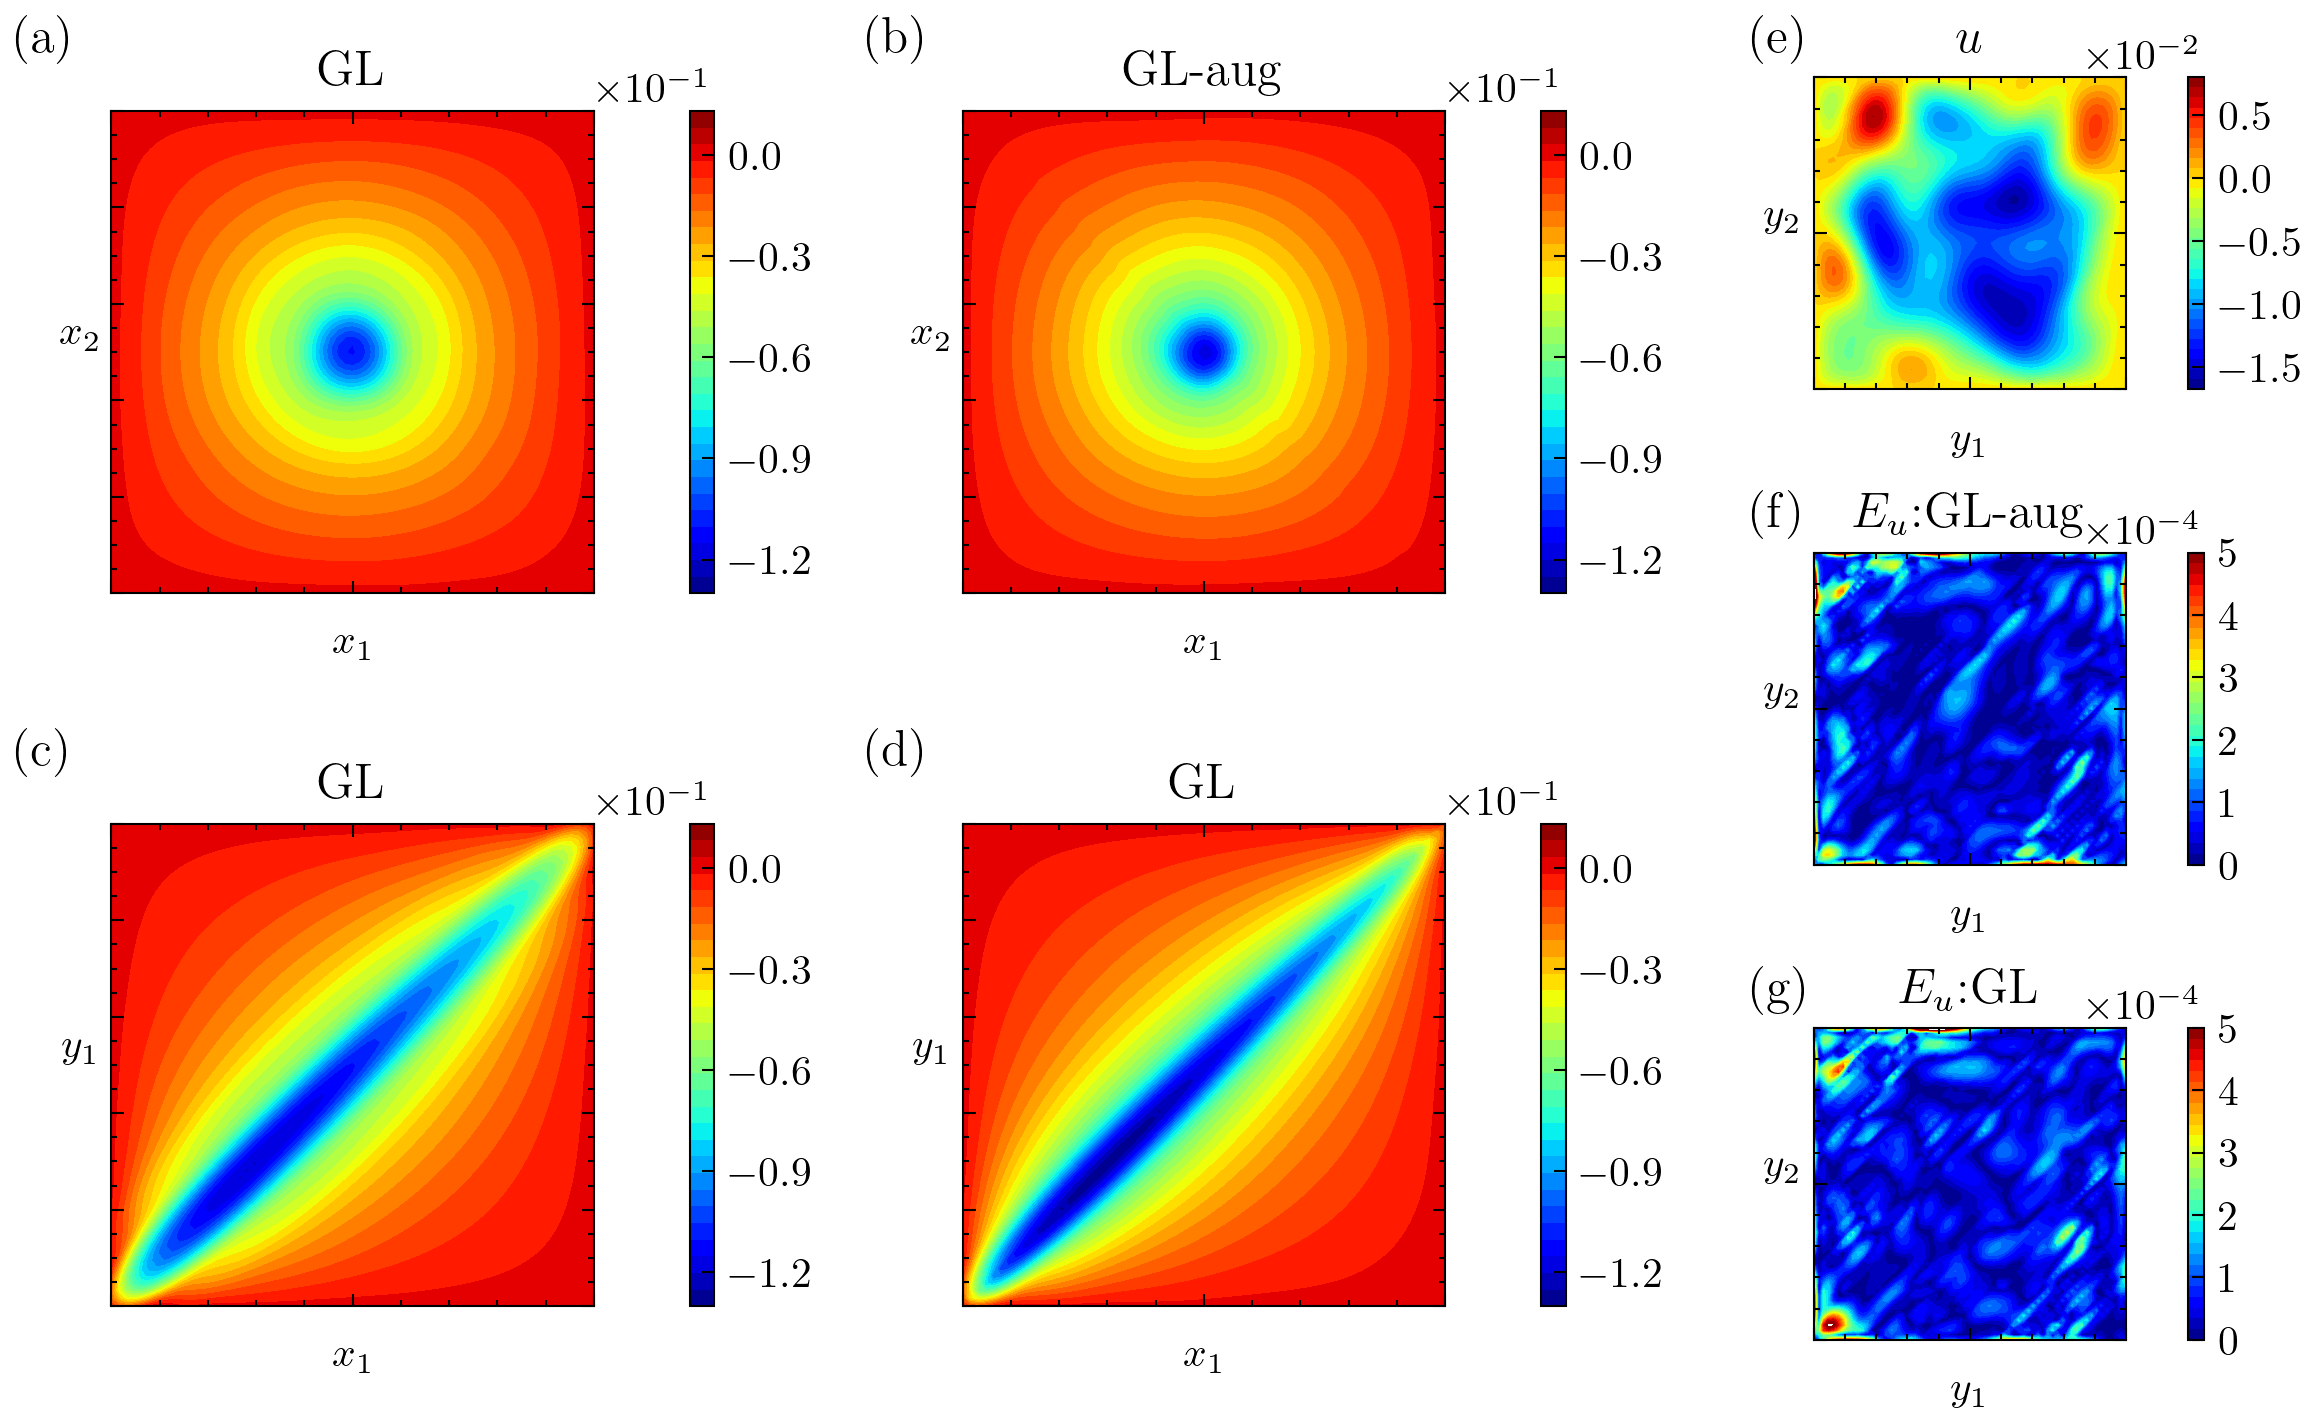

In [16]:
idx = 5 # np.argmin(err_diff)

G_gn = gn_poissonrect_kernel.reshape(65,65,65,65)
G_gnaug = gnaug2_poissonrect_kernel.reshape(65,65,65,65)

fig = plt.figure(figsize=(9,6))#, layout="constrained")
# gs0 = fig.add_gridspec(1, 2, left=1, right=2)

# gs00 = gs0[0].subgridspec(2, 2, wspace=0.1)
# gs01 = gs0[1].subgridspec(3, 1)

levels = np.linspace(-0.13,0.013,30)

# GL(x1,x2,0,0)
# ax = fig.add_subplot(gs00[0,0])
ax = plt.subplot2grid((6,10),(0,0), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gn[:,:,32,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(a)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL-aug(x1,x2,0,0)
# ax = fig.add_subplot(gs00[0,1])
ax = plt.subplot2grid((6,10),(0,4), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gnaug[:,:,32,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL-aug}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(b)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL(x1,0,y1,0)
# ax = fig.add_subplot(gs00[1,0])
ax = plt.subplot2grid((6,10),(3,0), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gn[:,32,:,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(c)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# GL-aug(x1,0,y1,0)
# ax = fig.add_subplot(gs00[1,1])
ax = plt.subplot2grid((6,10),(3,4), colspan=3, rowspan=3)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    G_gnaug[:,32,:,32], cmap='jet', levels=levels)
ax.title.set_text('$\\text{GL}$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y_1$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(d)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# # plt.tight_layout()

# U ref
# ax = fig.add_subplot(gs01[0,0])
ax = plt.subplot2grid((6,10),(0,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    U_test[:,idx].reshape(nh,nh), cmap='jet', levels=30)
ax.title.set_text('$u$')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(e)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

# GL-aug E 
err_levels = np.linspace(0,5e-4,30)
# ax = fig.add_subplot(gs01[1,0])
ax = plt.subplot2grid((6,10),(2,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    np.abs(U_test[:,idx]-U_gnaug[:,idx]).reshape(nh,nh), 
    cmap='jet', levels=err_levels)
ax.title.set_text('$E_u$:GL-aug')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(f)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# GL E
# ax = fig.add_subplot(gs01[2,0])
ax = plt.subplot2grid((6,10),(4,8), colspan=2, rowspan=2)
im = ax.contourf(
    xhh[:,0].reshape(nh,nh), xhh[:,1].reshape(nh,nh), 
    np.abs(U_test[:,idx]-U_gn[:,idx]).reshape(nh,nh), 
    cmap='jet', levels=err_levels)
ax.title.set_text('$E_u$:GL')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$',rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.locator = ticker.MaxNLocator(nbins=5)
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(-0.2, 1.2, '(g)', fontsize=12, ha="left", va="top")
ax.set_aspect('equal')

# plt.tight_layout()

outnm = './darcyrect-aug_result.pdf'
plt.savefig(outnm)

In [17]:
def pimprove(a, b, task):
    print('{:} : '.format(task), (b - a)/b)

In [18]:
pimprove(0.115, 0.189, 'schr')

schr :  0.3915343915343915


In [14]:
pimprove(0.140, 0.189, 'schr')

schr :  0.2592592592592592


In [15]:
pimprove(0.042, 0.048, 'bd')

bd :  0.12499999999999996


In [16]:
pimprove(0.071, 0.077, 'airy')

airy :  0.07792207792207799


In [17]:
pimprove(0.828, 0.867, 'prect')

prect :  0.04498269896193775


In [18]:
pimprove(1.185, 1.202, 'drect')

drect :  0.014143094841930038
